<a href="https://colab.research.google.com/github/hussaintaniya/stockpred2/blob/main/lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#using "Linear regression" to predict Microsoft stocks from 1986-03-12 to 2022-06-24

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

In [ ]:
#import data and display it

In [ ]:
data=pd.read_csv("/MSFT.csv")
print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     1986-03-13    0.088542    0.101563    0.088542    0.097222    0.061109   
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.063292   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.064384   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.062746   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.061655   
...          ...         ...         ...         ...         ...         ...   
9141  2022-06-17  244.699997  250.500000  244.029999  247.649994  247.649994   
9142  2022-06-21  250.259995  254.750000  249.509995  253.740005  253.740005   
9143  2022-06-22  251.889999  257.170013  250.369995  253.130005  253.130005   
9144  2022-06-23  255.570007  259.369995  253.630005  258.859985  258.859985   
9145  2022-06-24  261.809998  267.980011  261.720001  267.700012  267.700012   

          Volume  
0     1031788800  
1

In [ ]:
#index the data to date instead of the serial no.

In [ ]:
data.set_index(pd.DatetimeIndex(data['Date']),inplace=True)

In [ ]:
#trim the data. we will only keep the adj close column as it is used to analysie
#historical returns

In [ ]:
data=data[['Adj Close']]
print(data)

             Adj Close
Date                  
1986-03-13    0.061109
1986-03-14    0.063292
1986-03-17    0.064384
1986-03-18    0.062746
1986-03-19    0.061655
...                ...
2022-06-17  247.649994
2022-06-21  253.740005
2022-06-22  253.130005
2022-06-23  258.859985
2022-06-24  267.700012

[9146 rows x 1 columns]


In [ ]:
#plot adj close data against time

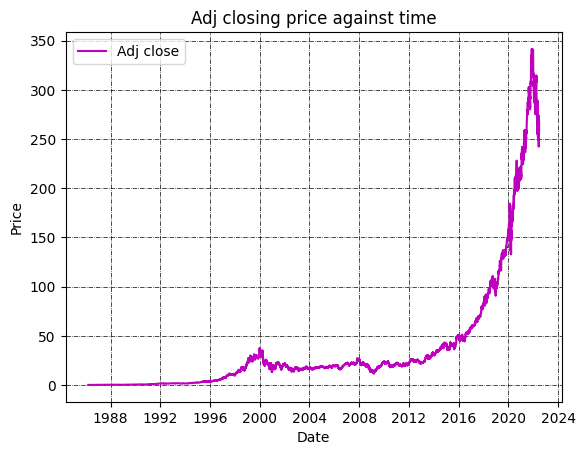

In [ ]:
plt.plot(data,color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Adj closing price against time')
plt.legend(['Adj close'])
plt.grid(which='major',color='k',linestyle='-.',linewidth='0.5')
plt.show()

In [ ]:
#add moving average

In [ ]:
! pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=e1b921103ef86e772f3566c8d00436207b63c01401d8e703f03cba78554dde32
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
import pandas_ta
data.ta.ema(close='Adj Close',length=10,append=True)

Date
1986-03-13           NaN
1986-03-14           NaN
1986-03-17           NaN
1986-03-18           NaN
1986-03-19           NaN
                 ...    
2022-06-17    253.630215
2022-06-21    253.650177
2022-06-22    253.555600
2022-06-23    254.520034
2022-06-24    256.916394
Name: EMA_10, Length: 9146, dtype: float64

In [ ]:
print(data.head(10))

            Adj Close    EMA_10
Date                           
1986-03-13   0.061109       NaN
1986-03-14   0.063292       NaN
1986-03-17   0.064384       NaN
1986-03-18   0.062746       NaN
1986-03-19   0.061655       NaN
1986-03-20   0.060018       NaN
1986-03-21   0.058381       NaN
1986-03-24   0.056745       NaN
1986-03-25   0.057836       NaN
1986-03-26   0.059473  0.060564


In [ ]:
#as our first 9 values are nan, we will remove them as we dont want nan values

In [ ]:
data=data.iloc[9:]
print(data.head(10))

            Adj Close    EMA_10
Date                           
1986-03-26   0.059473  0.060564
1986-03-27   0.060564  0.060564
1986-03-31   0.060018  0.060465
1986-04-01   0.059473  0.060284
1986-04-02   0.060018  0.060236
1986-04-03   0.060564  0.060296
1986-04-04   0.060564  0.060344
1986-04-07   0.059473  0.060186
1986-04-08   0.060018  0.060155
1986-04-09   0.061109  0.060329


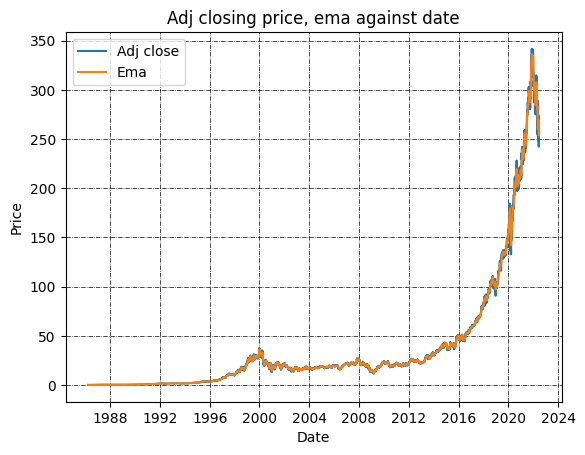

In [ ]:
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Adj closing price, ema against date")
plt.legend(['Adj close','Ema'])
plt.grid(which='major',color='k',linestyle='-.',linewidth=0.5)
plt.show()

In [ ]:
#splitting our data into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['Adj Close']], data[['EMA_10']], test_size=.2)

In [ ]:
#training our linear regression model

In [ ]:
model= LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('tested data')
print(X_test)
print('Predicted data')
print(y_pred)

tested data
            Adj Close
Date                 
1996-09-17   5.259238
1994-02-01   1.672054
1992-12-02   1.782543
2017-10-24  74.258041
1999-04-16  27.224298
...               ...
2010-03-19  22.860794
2009-02-11  14.433782
2013-06-12  29.447975
2014-12-04  42.837688
1995-01-26   2.352171

[1828 rows x 1 columns]
Predicted data
[[ 5.24468158]
 [ 1.66883522]
 [ 1.77897501]
 ...
 [29.35696776]
 [42.70436129]
 [ 2.34680264]]


In [ ]:
#mean absolute error
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  0.626850570071681


In [ ]:
# Mean squared error
print("Mean squared error:",mean_squared_error(y_test,y_pred) )

Mean squared error: 2.4654867162247194


In [ ]:
#r2 score
print("r2 score:",r2_score(y_test,y_pred))

r2 score: 0.9993331373220898


In [ ]:
#add actual values with the predicted values in a dataframe and plot

In [ ]:
df_pred=pd.DataFrame(y_test.values,columns=['Actual'],index=y_test.index)
df_pred['Predicted']=y_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

<ipython-input-44-e3355d2c8585>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')


,Date,Actual,Predicted
0,1996-09-17,5.035454,5.244682
1,1994-02-01,1.667465,1.668835
2,1992-12-02,1.805559,1.778975
3,2017-10-24,73.289833,74.025407
4,1999-04-16,28.230199,27.140319
...,...,...,...
1823,2010-03-19,22.626989,22.790606
1824,2009-02-11,14.138480,14.390229
1825,2013-06-12,29.467238,29.356968
1826,2014-12-04,42.345855,42.704361


import numpy as np
from google.colab import autoviz
df_7500683211258306376 = autoviz.get_registered_df('df_7500683211258306376')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7500683211258306376, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4742775081354479123 = autoviz.get_registered_df('df_4742775081354479123')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4742775081354479123, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6087489041929071244 = autoviz.get_registered_df('df_6087489041929071244')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6087489041929071244, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6365470841622196499 = autoviz.get_registered_df('df_6365470841622196499')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6365470841622196499, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2240632974128871065 = autoviz.get_registered_df('df_2240632974128871065')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2240632974128871065, *[[['Actual', 'Predicted']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2614953376272760165 = autoviz.get_registered_df('df_2614953376272760165')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2614953376272760165, *['Date', 'Actual', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_9205923953950617334 = autoviz.get_registered_df('df_9205923953950617334')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_9205923953950617334, *['Date', 'Predicted', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8351266573522980203 = autoviz.get_registered_df('df_8351266573522980203')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8351266573522980203, *['Date', 'count()', None], **{})
chart

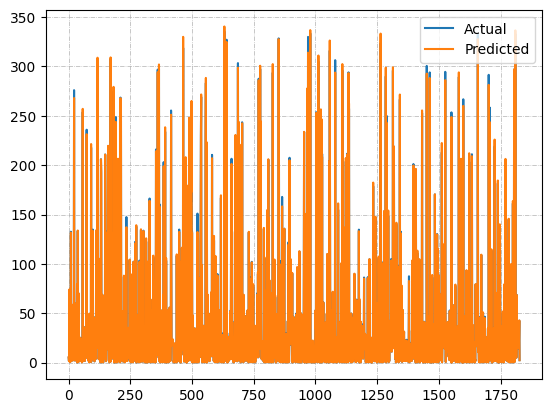

In [ ]:
#plot the data
plt.plot(df_pred[['Actual','Predicted']])
plt.legend(['Actual','Predicted'])
plt.grid(linestyle='-.',linewidth='0.5')
plt.show()